In [1]:
#pip install beautifulsoup4

In [2]:
#pip install selenium

In [3]:
import time 
import pandas as pd 
from selenium import webdriver 
from selenium.webdriver import Chrome 
from selenium.webdriver.common.by import By 

from bs4 import BeautifulSoup as bs

In [4]:
# Define the Chrome webdriver options
options = webdriver.ChromeOptions() 
options.add_argument('--headless')

In [5]:
# By default, Selenium waits for all resources to download before taking actions.
# However, we don't need it as the page is populated with dynamically generated JavaScript code.
options.page_load_strategy = "none"
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--no-sandbox")
#options.add_argument("--headless")  # Old headless Chrome
# OR:
options.add_argument("--headless=new")  # New headless Chrome

In [6]:
# Pass the defined options objects to initialize the web driver 
driver = Chrome(options=options)

In [7]:
# Set an implicit wait of 5 seconds to allow time for elements to appear before throwing an exception
driver.implicitly_wait(3)

In [20]:
def html_to_listings(html):
    
    soup = bs(html, "html.parser")
    
    ul = soup.find("ul", class_="hz-Listings hz-Listings--list-view")
    
    lis = ul.findAll("li")
    
    ims = []
    
    listings = []
    
    verbose = False
    
    for li in lis:
    
        l = Listing()
        
        p = li.prettify()
        
        if verbose: print(p,'\n')
        
        im = li.find("img")
    
        title = li.find("h3", class_ = "hz-Listing-title").text
        price = li.find("p", class_ = "hz-Listing-price hz-Listing-price--mobile hz-text-price-label").text
        text = li.find("p", class_ = "hz-Listing-description").text
        date = li.find("span", class_ ="hz-Listing-date hz-Listing-date--desktop").text
    
        mileage_div = li.find("div", class_ = "hz-Listing-attributes-nap-mileage")
        
        if mileage_div:
            mileage = mileage_div.find("span", class_="hz-Attribute hz-Attribute--default").text
            l.mileage = mileage
    
        trust_div = li.find("div", class_= "hz-Listing-trust-items-and-attributes")
        
        if trust_div:
            try:
                l.build_year = trust_div.find("span", class_="hz-Attribute hz-Attribute--default").text
            except:
                pass
            
        location_div = li.find("span", class_ = "hz-Listing-location")
        
        if location_div:
            location = location_div.find("span", class_ = "hz-Listing-distance-label").text
            l.location = location
            
        l.title = title
        l.price = price
        l.text = text
        l.date = date
        
        if im:
            try:
                l.im_src = im.attrs['src']
                l.im_alt = im.attrs['alt']
                l.im_title = im.attrs['title']
            except NameError as e:
                print("NameError:", e)
                pass
            except KeyError as e:
                print("KeyError:", e)
                pass
                
        listings.append(l)


    return listings

In [21]:
class Listing:

    def __init__(self):
        
        self.title = None
        self.price = None
        
        self.im_src = None
        self.im_alt = None
        self.im_title = None

    def _to_dict(self):
        return {x: self.__getattribute__(x) for x in dir(self) if not x.startswith('_')}

    def __repr__(self):

        lines = []
        
        attrs = [x for x in dir(self) if not x.startswith('_')]
        for attr in attrs:
            
            val = self.__getattribute__(attr)
            
            if val:
                lines.append("{:8.8}: {:20.20}...".format(attr, val))

        return '\n'.join(lines)

In [22]:

url = "https://www.marktplaats.nl/l/motoren/motoren-yamaha/#q:mt-07%7CsearchInTitleAndDescription:true" 

urls = []

for i in range(8):
    url = "https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/{:}/#q:mt-07|searchInTitleAndDescription:true".format(i)
    urls.append(url)
    

In [23]:
urls

['https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/0/#q:mt-07|searchInTitleAndDescription:true',
 'https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/1/#q:mt-07|searchInTitleAndDescription:true',
 'https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/2/#q:mt-07|searchInTitleAndDescription:true',
 'https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/3/#q:mt-07|searchInTitleAndDescription:true',
 'https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/4/#q:mt-07|searchInTitleAndDescription:true',
 'https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/5/#q:mt-07|searchInTitleAndDescription:true',
 'https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/6/#q:mt-07|searchInTitleAndDescription:true',
 'https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/7/#q:mt-07|searchInTitleAndDescription:true']

In [24]:
listings_per_page = {}

for i, url in enumerate(urls):

    print(i, url)
    
    driver.get(url) 
    time.sleep(5)
    html = driver.page_source

    more_listings = html_to_listings(html)

    listings_per_page[i] = more_listings
    

0 https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/0/#q:mt-07|searchInTitleAndDescription:true
1 https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/1/#q:mt-07|searchInTitleAndDescription:true
2 https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/2/#q:mt-07|searchInTitleAndDescription:true
3 https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/3/#q:mt-07|searchInTitleAndDescription:true
4 https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/4/#q:mt-07|searchInTitleAndDescription:true
5 https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/5/#q:mt-07|searchInTitleAndDescription:true
6 https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/6/#q:mt-07|searchInTitleAndDescription:true
KeyError: 'title'
7 https://www.marktplaats.nl/l/motoren/motoren-yamaha/p/7/#q:mt-07|searchInTitleAndDescription:true


In [25]:
listings = []
for page in listings_per_page:
    listings += listings_per_page[page]
    

In [28]:
len(listings)

219

In [29]:
l = listings[0]

In [30]:
l

build_ye: 2020                ...
date    : Vandaag             ...
im_alt  : YAMAHA MT-07 ABS (bj...
im_src  : https://images.markt...
im_title: YAMAHA MT-07 ABS (bj...
location: Vlijmen             ...
mileage : 9.349 km            ...
price   : € 7.200,-           ...
text    : Wij berekenen geen a...
title   : YAMAHA MT-07 ABS (bj...

In [31]:
l.date, l.price, l.mileage,l.title

('Vandaag', '€\xa07.200,-', '9.349 km', 'YAMAHA MT-07 ABS (bj 2020) ABS MT07')

In [32]:
len(listings)

219

In [33]:
df = pd.DataFrame.from_dict([l._to_dict() for l in listings])

In [34]:
df.to_csv("scrape-results_mt-07.csv")

In [35]:
df

,build_year,date,im_alt,im_src,im_title,location,mileage,price,text,title
0,2020,Vandaag,"YAMAHA MT-07 ABS (bj 2020) ABS MT07, Motoren, ...",https://images.marktplaats.com/api/v1/listing-...,"YAMAHA MT-07 ABS (bj 2020) ABS MT07, Motoren, ...",Vlijmen,9.349 km,"€ 7.200,-",Wij berekenen geen afleverkosten inruil is mog...,YAMAHA MT-07 ABS (bj 2020) ABS MT07
1,2014,9 feb. '24,"Yamaha MT-07 2014, Motoren, Motoren | Yamaha, ...",https://images.marktplaats.com/api/v1/listing-...,"Yamaha MT-07 2014, Motoren, Motoren | Yamaha, ...",Best,28.480 km,"€ 5.650,-",Yamaha mt 07 04-07-2014 kmstand 28480 prachtig...,Yamaha MT-07 2014
2,2019,Vandaag,YAMAHA MT 07 ABS (bj 2019) MT07 35KW A2 Geschi...,https://images.marktplaats.com/api/v1/listing-...,YAMAHA MT 07 ABS (bj 2019) MT07 35KW A2 Geschi...,'s-Gravenzande,17.455 km,"€ 6.945,-",De yamaha mt-07 is een naakte straatmotorfiets...,YAMAHA MT 07 ABS (bj 2019) MT07 35KW A2 Geschikt
3,2021,27 jan. '24,"Yamaha MT-07 35kW/A2, Motoren, Motoren | Yamah...",https://images.marktplaats.com/api/v1/listing-...,"Yamaha MT-07 35kW/A2, Motoren, Motoren | Yamah...",Breda,22.458 km,"€ 8.000,-",Yamaha mt-07 35kw 2021 1e eigenaar 22.458 Km t...,Yamaha MT-07 35kW/A2
4,2017,8 feb. '24,"YAMAHA MT-07 ABS, Motoren, Motoren | Yamaha, N...",https://images.marktplaats.com/api/v1/listing-...,"YAMAHA MT-07 ABS, Motoren, Motoren | Yamaha, N...",Lekkerkerk,37.000 km,"€ 5.800,-",Yamaha mt-07 abs 37.000Km gebruikt voor woon-/...,YAMAHA MT-07 ABS
...,...,...,...,...,...,...,...,...,...,...
214,2023,31 jan. '24,"YAMAHA MT 07 - 2023 - Garantie - Tft scherm, M...",https://images.marktplaats.com/api/v1/listing-...,"YAMAHA MT 07 - 2023 - Garantie - Tft scherm, M...",Venray,2.500 km,Gereserveerd,Aangeboden door leigraaf motoren: een zéér net...,YAMAHA MT 07 - 2023 - Garantie - Tft scherm
215,2015,28 jan. '24,Yamaha MT-07 ABS *MOTO CAGE* Leovince uitlaat ...,https://images.marktplaats.com/api/v1/listing-...,Yamaha MT-07 ABS *MOTO CAGE* Leovince uitlaat ...,Tilburg,18.100 km,Gereserveerd,Wil u altijd als eerste op de hoogte zijn van ...,Yamaha MT-07 ABS *MOTO CAGE* Leovince uitlaat ...
216,2023,28 jan. '24,YAMAHA MT 07 - 2023 - Quickshifter - A2 - Vol ...,https://images.marktplaats.com/api/v1/listing-...,YAMAHA MT 07 - 2023 - Quickshifter - A2 - Vol ...,Venray,4.985 km,Gereserveerd,Aangeboden door leigraaf motoren: een zéér net...,YAMAHA MT 07 - 2023 - Quickshifter - A2 - Vol ...
217,2019,18 jan. '24,"YAMAHA MT 07 ABS - 2019 - Leovince - A2/35Kw, ...",https://images.marktplaats.com/api/v1/listing-...,"YAMAHA MT 07 ABS - 2019 - Leovince - A2/35Kw, ...",Venray,6.905 km,Gereserveerd,Aangeboden door leigraaf motoren: een zéér net...,YAMAHA MT 07 ABS - 2019 - Leovince - A2/35Kw


In [180]:
import matplotlib.pyplot as plt

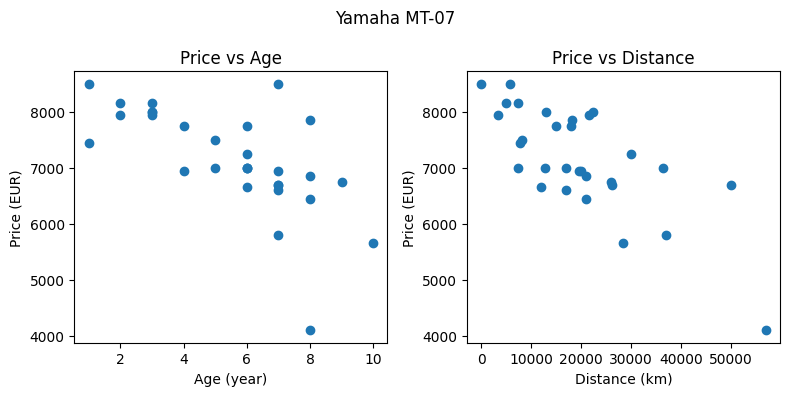

In [195]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

ax = axs[0]

plt.suptitle('Yamaha MT-07')

ax.scatter(ages, prices)
ax.set_title('Price vs Age')
ax.set_ylabel('Price (EUR)')
ax.set_xlabel('Age (year)')

ax = axs[1]
ax.scatter(kms, prices)
ax.set_title('Price vs Distance')
ax.set_ylabel('Price (EUR)')
ax.set_xlabel('Distance (km)')

plt.tight_layout()
plt.savefig('yamaha_mt_07.png')